<a href="https://colab.research.google.com/github/mohsenshahii/Heart/blob/main/heart_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import seaborn as sns
heart_df = pd.read_csv('heart_2020_cleaned.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
Age_Cat= heart_df.groupby('AgeCategory').sum()
print(Age_Cat)

In [111]:
heart_df.replace('No', 1, inplace = True)
heart_df.replace('Yes', 0, inplace = True)
heart_df['Sex'].replace(['Female', 'Male'], [0, 1], inplace = True)
heart_df['Race'].replace(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'], [1, 2, 3, 4, 5, 6] , inplace = True)
heart_df['GenHealth'].replace(['Very good','Good', 'Excellent', 'Fair', 'Poor'], [5, 4, 3, 2, 1], inplace = True)
heart_df['Diabetic'].replace(['No, borderline diabetes','Yes (during pregnancy)'], [3, 2], inplace = True)
heart_df['AgeCategory'].replace(['18-24','25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace = True)

In [ ]:
#sns.pairplot(heart_df, hue='HeartDisease', height=1.5)

In [113]:
y_heart = heart_df['HeartDisease']

In [114]:
x_heart = heart_df.drop('HeartDisease', axis=1)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x_heart, y_heart, test_size=0.3, random_state=1)

In [117]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [118]:
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)

0.8455268451828766

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8455268451828766

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)

0.8616308279219087

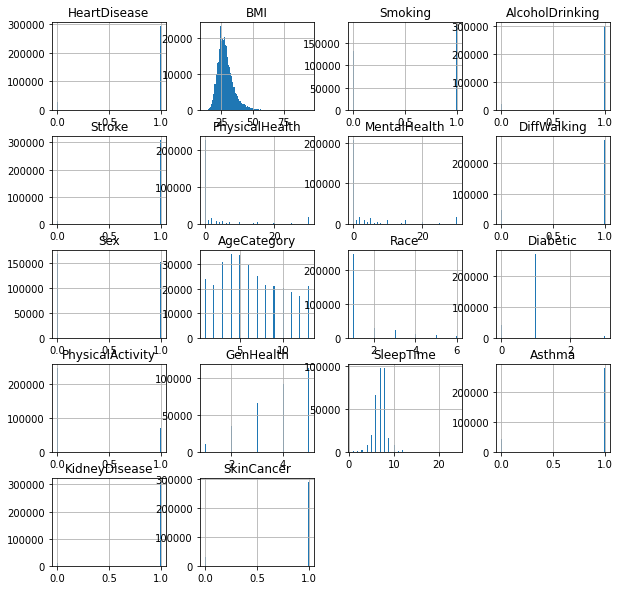

In [122]:
heart_df.hist(bins=100,figsize=(10,10))
plt.show()

In [123]:
import matplotlib.pyplot as plt
import seaborn as sb

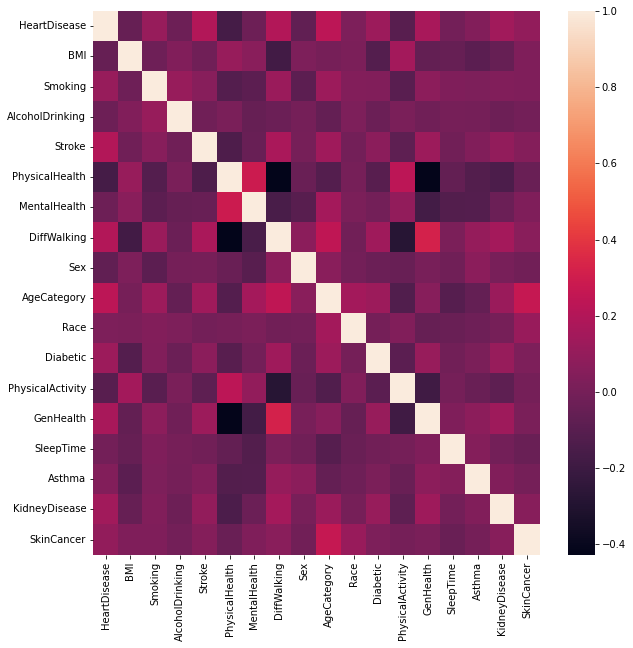

In [124]:
plt.figure(figsize=(10,10))
sb.heatmap(heart_df.corr())
plt.show()

In [ ]:
plt.plot(heart_df['BMI'],heart_df['HeartDisease'])
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(heart_df['BMI'],heart_df['HeartDisease'])

In [102]:
heart_df['Race'].value_counts()

1    245212
2     27446
3     22939
4     10928
5      8068
6      5202
Name: Race, dtype: int64

In [17]:
heart_df.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(heart_df['PhysicalHealth'], heart_df['SleepTime'], c=heart_df['HeartDisease'])

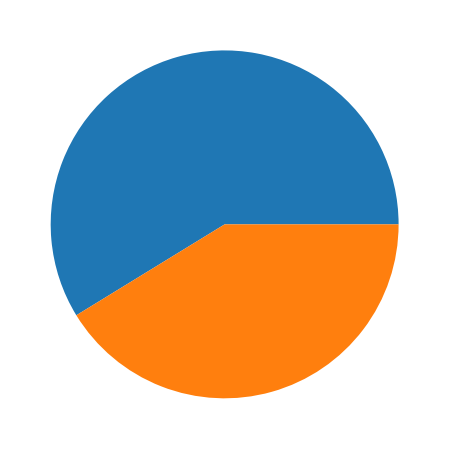

In [126]:
plt.figure(figsize=(15,8))
plt.pie(heart_df['Smoking'].value_counts())
plt.show()

In [127]:
heart_df.groupby('AgeCategory').sum()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
AgeCategory,,,,,,,,,,,,,,,,,
1,18704,633236.34,13626,23471,21855,108057.0,45946.0,16213,9437,30584,21213,8689,89154,182133.0,21908,22186,17918
2,17433,592852.33,10728,20581,19772,89745.0,48986.0,16424,9292,27814,17955,6113,81163,159230.0,19078,19883,16645
3,26218,875281.08,16140,29468,29174,121777.0,79606.0,24878,13976,41804,26264,7813,117774,226984.0,27394,29095,25500
4,30050,979272.28,18588,32050,32446,131645.0,98614.0,28130,16103,47349,29548,8043,130109,245963.0,30031,32462,29543
5,30359,970890.40,18250,31352,32203,145447.0,119604.0,27714,16114,48659,29972,8111,126269,237793.0,29188,32314,30348
6,27555,865898.25,17085,27539,28656,119844.0,120693.0,25107,14270,44193,26996,6785,112274,207272.0,25814,28759,27569
7,23999,746867.81,15409,23423,24697,91568.0,109695.0,22274,12047,39627,23594,5638,96766,175749.0,21910,24682,24093
8,21047,642555.33,13066,20107,21363,65827.0,95569.0,19885,10353,35216,20820,4502,83801,150446.0,18656,21340,21018
9,20520,613370.25,11925,19200,20713,54087.0,98207.0,19685,10054,34634,20653,3940,81561,144457.0,17941,20640,20592


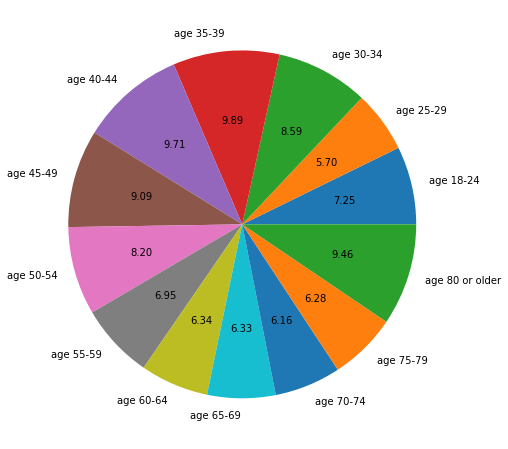

In [128]:
temp = heart_df.groupby('AgeCategory').sum()
plt.figure(figsize=(15,8))
plt.pie(temp['Smoking'], labels='age ' + Age_Cat.index, autopct=lambda x:str(x)[:4])
plt.show()